# RE-EDS - PEOE - Energy Offset Estimation


In [1]:
#Imports
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import reeds
from pygromos.files import repdat, imd
from pygromos.utils import bash
from reeds.function_libs.file_management import file_management
from IPython.display import HTML, Image,Markdown

/cluster/home/bschroed/code/reeds/reeds/submodules/pygromos/pygromos/files/topology/top.py:20: UserWarning: Module topo-files is under Development and not entirely implemented!
  warnings.warn("Module topo-files is under Development and not entirely implemented!")


## Parse Data

In [2]:
#Define data path:
in_imd_path = "/cluster/work/igc/bschroed/REEDS/CHK1/water_d5/c_eoff_shuffle/input/repex_eoff.imd"

data_dir = "/cluster/work/igc/bschroed/REEDS/CHK1/water_d5/c_eoff_shuffle/analysis_800ps/data"
out_prefix = "CHK1_disres5_water_eoff_shuffle_energies_"
out_dir = bash.make_folder(os.getcwd()+"/eoff")

In [3]:
#parse
energy_trajectories = file_management.parse_csv_energy_trajectories(data_dir, out_prefix)
imd_file = imd.Imd(in_imd_path)

## Detect Undersampling

In [4]:


import reeds.function_libs.analysis.sampling as sampling_ana

undersampling_frac_thresh = 0.9
state_undersampling_occurrence_potential_threshold = [0,0,0,0,0]
s_values = list(map(float, imd_file.REPLICA_EDS.RES))

(sampling_results, out_dir) = sampling_ana.detect_undersampling(out_path = out_dir, 
                                                                ene_traj_csvs = energy_trajectories,
                                                                s_values = s_values, 
                                                                state_potential_treshold= state_undersampling_occurrence_potential_threshold, 
                                                                undersampling_occurence_sampling_tresh=undersampling_frac_thresh)



/cluster/home/bschroed/code/reeds/reeds/function_libs/analysis/sampling.py:405: UserWarning: Could not find undersampling!
  warnings.warn("Could not find undersampling!")
/cluster/home/bschroed/code/reeds/reeds/function_libs/visualization/sampling_plots.py:320: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/cluster/home/bschroed/code/reeds/reeds/function_libs/visualization/sampling_plots.py:363: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


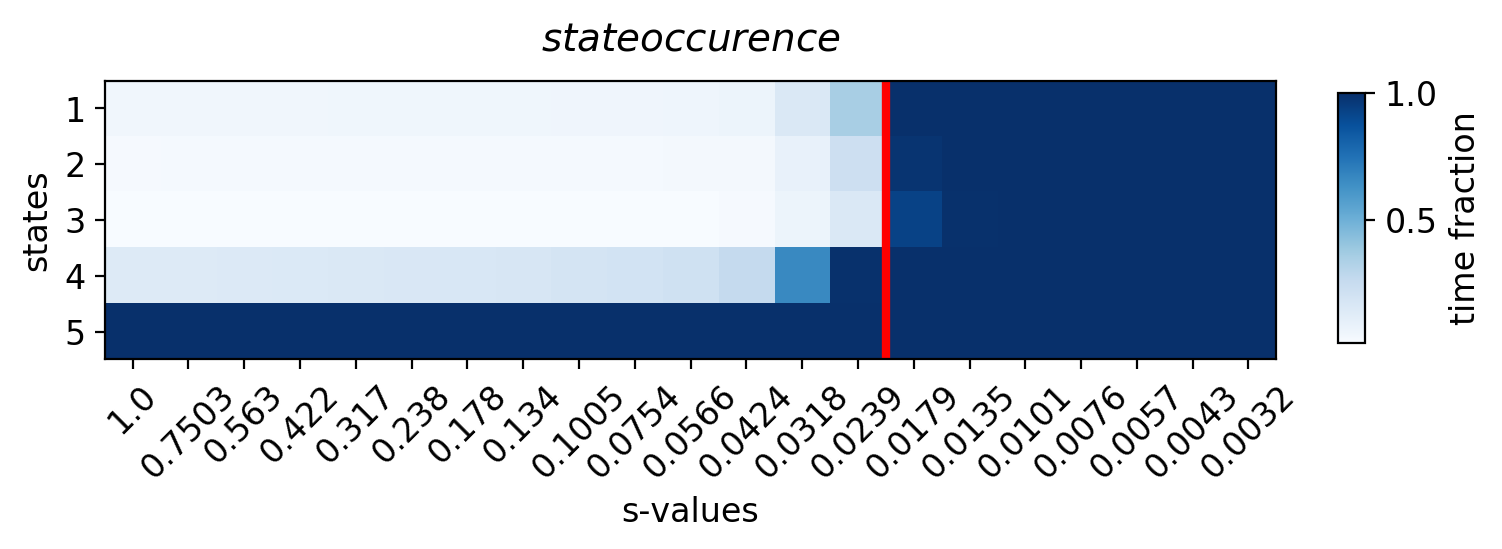

In [5]:
Image(out_dir+"/sampling_undersample_matrix.png", )

## Estimate Offsets

In [6]:
from reeds.function_libs.optimization import eds_energy_offsets as peoe

In [7]:
num_state = int(imd_file.REPLICA_EDS.NUMSTATES)
s_values = list(map(float, imd_file.REPLICA_EDS.RES))
initial_offsets = [0.0 for state in range(num_state)]
temp = 298
means, all_eoffs = peoe.estimate_energy_offsets(ene_trajs = energy_trajectories, 
                                                initial_offsets =[0 for x in range(num_state)], 
                                                sampling_stat=sampling_results, s_values = s_values,
                                                out_path = out_dir, temp = temp, trim_beg = 0., 
                                                undersampling_idx = sampling_results['undersamplingThreshold'],
                                                plot_results = True, calc_clara = False)


TOTLEN:  20000


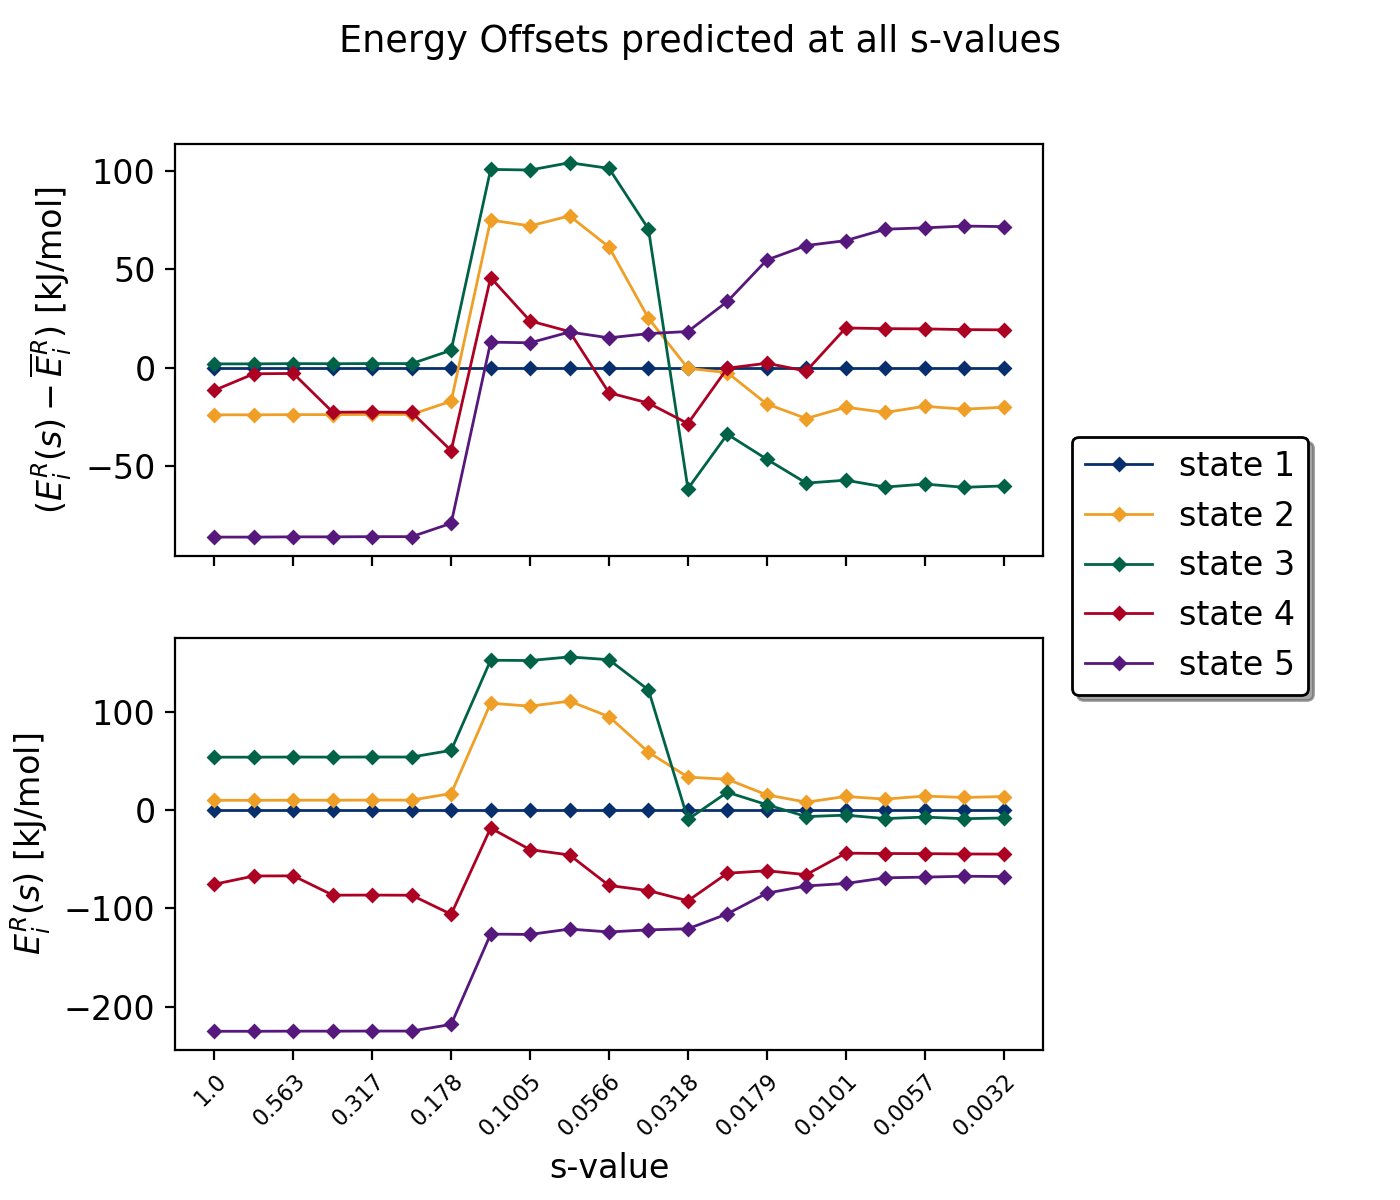

In [8]:
Image(out_dir+"/eoffs_vs_s.png", )

In [9]:
Markdown(out_dir+"/energy_offsets.out")


Energy offsets predicted for each replica

| s		|	state 1	|state 2	|state 3	|state 4	|state 5|
|---	|---	|---	|---	|---	|---	|
| 1.00000	|	0.00	|10.12	|54.03	|-75.31	|-224.99	|
| 0.75030	|	0.00	|10.12	|54.03	|-66.92	|-224.99	|
| 0.56300	|	0.00	|10.22	|54.15	|-66.78	|-224.86	|
| 0.42200	|	0.00	|10.22	|54.09	|-86.44	|-224.86	|
| 0.31700	|	0.00	|10.33	|54.19	|-86.35	|-224.77	|
| 0.23800	|	0.00	|10.33	|54.16	|-86.52	|-224.77	|
| 0.17800	|	0.00	|17.04	|60.94	|-105.92	|-217.99	|
| 0.13400	|	0.00	|108.94	|152.70	|-18.13	|-126.08	|
| 0.10050	|	0.00	|105.96	|152.38	|-40.11	|-126.40	|
| 0.07540	|	0.00	|111.06	|156.09	|-45.51	|-120.95	|
| 0.05660	|	0.00	|95.27	|153.23	|-76.57	|-123.89	|
| 0.04240	|	0.00	|59.12	|122.47	|-81.80	|-121.75	|
| 0.03180	|	0.00	|33.73	|-9.30	|-92.19	|-120.68	|
| 0.02390	|	0.00	|31.53	|18.32	|-64.10	|-105.45	|
| 0.01790	|	0.00	|15.61	|5.65	|-61.59	|-84.40	|
| 0.01350	|	0.00	|8.25	|-6.46	|-65.57	|-77.06	|
| 0.01010	|	0.00	|14.00	|-5.00	|-43.68	|-74.57	|
| 0.00760	|	0.00	|11.34	|-8.48	|-44.04	|-68.77	|
| 0.00570	|	0.00	|14.44	|-6.95	|-44.15	|-68.09	|
| 0.00430	|	0.00	|13.00	|-8.60	|-44.52	|-67.18	|
| 0.00320	|	0.00	|13.96	|-7.89	|-44.65	|-67.46	|

Minimum potential energy count per replica

| s		|	state 1	|state 2	|state 3	|state 4	|state 5|
|---	|---	|---	|---	|---	|---	|
| 1.00000	|	0	|0	|0	|0	|20000	|
| 0.75030	|	0	|0	|0	|0	|20000	|
| 0.56300	|	0	|0	|0	|0	|20000	|
| 0.42200	|	0	|0	|0	|0	|20000	|
| 0.31700	|	0	|0	|0	|0	|20000	|
| 0.23800	|	0	|0	|0	|0	|20000	|
| 0.17800	|	0	|0	|0	|0	|20000	|
| 0.13400	|	0	|0	|0	|0	|20000	|
| 0.10050	|	0	|0	|0	|0	|20000	|
| 0.07540	|	0	|0	|0	|0	|20000	|
| 0.05660	|	0	|0	|0	|3	|19997	|
| 0.04240	|	0	|0	|0	|87	|19913	|
| 0.03180	|	0	|0	|0	|752	|19248	|
| 0.02390	|	2	|0	|3	|1532	|18463	|
| 0.01790	|	49	|6	|107	|4855	|14983	|
| 0.01350	|	77	|10	|151	|5589	|14173	|
| 0.01010	|	95	|13	|186	|5947	|13759	|
| 0.00760	|	108	|14	|211	|6118	|13549	|
| 0.00570	|	117	|20	|229	|6234	|13400	|
| 0.00430	|	125	|21	|245	|6296	|13313	|
| 0.00320	|	126	|21	|253	|6320	|13280	|


Count of potential energies below the threshold per replica
potential thresholds used: [0, 0, 0, 0, 0]

| s		|	state 1	|state 2	|state 3	|state 4	|state 5|
|---	|---	|---	|---	|---	|---	|
| 1.00000	|	957	|536	|306	|2871	|20000	|
| 0.75030	|	972	|539	|314	|2920	|20000	|
| 0.56300	|	983	|540	|316	|2976	|20000	|
| 0.42200	|	992	|550	|319	|3046	|20000	|
| 0.31700	|	1001	|556	|321	|3148	|20000	|
| 0.23800	|	1019	|562	|328	|3262	|20000	|
| 0.17800	|	1034	|572	|335	|3373	|20000	|
| 0.13400	|	1056	|578	|336	|3531	|20000	|
| 0.10050	|	1076	|594	|346	|3716	|20000	|
| 0.07540	|	1111	|609	|353	|3936	|20000	|
| 0.05660	|	1157	|645	|374	|4242	|20000	|
| 0.04240	|	1377	|763	|488	|5300	|20000	|
| 0.03180	|	3139	|1761	|1343	|13254	|20000	|
| 0.02390	|	6999	|4462	|3212	|19882	|19993	|
| 0.01790	|	19945	|19682	|18593	|20000	|20000	|
| 0.01350	|	19999	|20000	|19857	|20000	|20000	|
| 0.01010	|	20000	|20000	|20000	|20000	|20000	|
| 0.00760	|	20000	|20000	|20000	|20000	|20000	|
| 0.00570	|	20000	|20000	|20000	|20000	|20000	|
| 0.00430	|	20000	|20000	|20000	|20000	|20000	|
| 0.00320	|	20000	|20000	|20000	|20000	|20000	|


Fractions of undersampling occurrence sampling
fraction treshold: 0.9

| s		|	state 1	|state 2	|state 3	|state 4	|state 5|
|---	|---	|---	|---	|---	|---	|
| 1.00000	|	0	|0	|0	|0	|1	|
| 0.75030	|	0	|0	|0	|0	|1	|
| 0.56300	|	0	|0	|0	|0	|1	|
| 0.42200	|	0	|0	|0	|0	|1	|
| 0.31700	|	0	|0	|0	|0	|1	|
| 0.23800	|	0	|0	|0	|0	|1	|
| 0.17800	|	0	|0	|0	|0	|1	|
| 0.13400	|	0	|0	|0	|0	|1	|
| 0.10050	|	0	|0	|0	|0	|1	|
| 0.07540	|	0	|0	|0	|0	|1	|
| 0.05660	|	0	|0	|0	|0	|1	|
| 0.04240	|	0	|0	|0	|0	|1	|
| 0.03180	|	0	|0	|0	|1	|1	|
| 0.02390	|	0	|0	|0	|1	|1	|
| 0.01790	|	1	|1	|1	|1	|1	|
| 0.01350	|	1	|1	|1	|1	|1	|
| 0.01010	|	1	|1	|1	|1	|1	|
| 0.00760	|	1	|1	|1	|1	|1	|
| 0.00570	|	1	|1	|1	|1	|1	|
| 0.00430	|	1	|1	|1	|1	|1	|
| 0.00320	|	1	|1	|1	|1	|1	|

Undersampling found at replica 16 with s = 0.0135

New energy offset for each state:

state 1 : 0.0 +-  0.0

state 2 : 12.5 +-  2.15

state 3 : -7.23 +-  1.26

state 4 : -47.77 +-  7.97

state 5 : -70.52 +-  3.84

